<a href="https://colab.research.google.com/github/Monakairine/python-notebooks/blob/main/Pub_Sub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 -Google Cloud Pub/Sub is a messaging service that allows for the sending and receiving of messages between independent applications. It is a fully managed service that can handle both real-time and batch messaging with low latency and high reliability. Some common use cases for Pub/Sub include:

Asynchronous communication between microservices
Event-driven architecture
Stream processing
Decoupling senders and receivers
Handling spikes in traffic
It allows application to send and receive messages reliably, quickly, and asynchronously, which makes it a great solution for event-driven architectures and real-time data processing pipelines.

2 -Google Cloud Pub/Sub works by allowing applications to send messages to "topics," which act as a message queue. Other applications can then subscribe to these topics in order to receive the messages. Here is a step-by-step overview of how it works:

**An application sends a message to a specific topic.
The message is stored in the topic, and is made available to all subscribers of that topic.
Subscribing applications pull messages from the topic.**
Once a message is pulled, it is considered "delivered" and is no longer available to other subscribers.
The subscribing application processes the message and acknowledges receipt.
It is worth noting that Pub/Sub allows for multiple subscribers to a single topic, and multiple topics to be created, so that different applications can subscribe to the topics that are relevant to them.

Also, messages in Pub/Sub are delivered at least once, and if the subscriber fails to process a message, it will be redelivered. This ensure that no message is lost in the process.

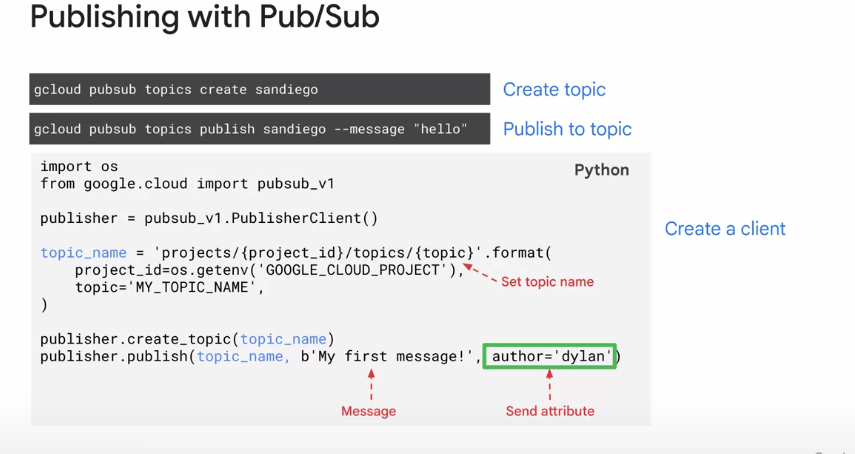

In [4]:
# !pip install google-cloud-pubsub

In [3]:
from google.cloud import pubsub_v1
from google.colab import auth
from google.cloud import pubsub
import time
from google.api_core import exceptions as gexc
from google.cloud import bigquery


## List available topics:

In [ ]:
#listando os tópicos existentes
project_id = "certain-purpose-341420"

publisher = pubsub_v1.PublisherClient()
project_path = f"projects/{project_id}"

for topic in publisher.list_topics(request={"project": project_path}):
    print(topic)


name: "projects/certain-purpose-341420/topics/big2"

name: "projects/certain-purpose-341420/topics/add-on-big"



## Publishing messages to a topic

In [ ]:
# Set the project ID and topic name
project_id = "certain-purpose-341420"
topic_name = "add-on-big"

# Initialize the publisher client
publisher = pubsub_v1.PublisherClient()

# Create the topic path
topic_path = publisher.topic_path(project_id, topic_name)

# Define the message payload
message = b"Hello, World2222222222!"

# Publish the message to the topic
future = publisher.publish(topic_path, data=message)

# Wait for the message to be published
result = future.result()

# Print the message ID
print(f'Message published to {topic_name} with message ID {result}')

Message published to add-on-big with message ID 7152386145875734


## Receiving messages from a topic



In [ ]:
subscription_name = 'add-on-big-sub'

subscriber = pubsub_v1.SubscriberClient()
subscription_path = subscriber.subscription_path(project_id, subscription_name)

NUM_MESSAGES =2
ACK_DEADLINE = 30
SLEEP_TIME = 10


pull_request = pubsub_v1.types.PullRequest(
        subscription=subscription_path,
        max_messages=NUM_MESSAGES,
        return_immediately=True
)

response = subscriber.pull(pull_request)
response

received_messages {
  ack_id: "RFAGFixdRkhRNxkIaFEOT14jPzUgKEUbAwgUBXx9cF9VdV5cdGhRDRlyfWB9bAlAAgAUBnZYURsHaE5tdR-FnITiS0NVbVsWAwFNVX9bXhMKbVtfcS_O496MvsucVkAvOdbUzu5pe6e5ur9uZiM9XxJLLD5-MTJFQV5AEkw6B0RJUytDCypYEU4EISE-MD5FUw"
  message {
    data: "Hello, World2222222222!"
    message_id: "7152386145875734"
    publish_time {
      seconds: 1678463118
      nanos: 989000000
    }
  }
}

## Writing Google Cloud Pub/Sub messages to a BigQuery table

In [ ]:

def write_pubsub_messages_to_bigquery(project_id, subscription_name):
    subscriber = pubsub_v1.SubscriberClient()
    subscription_path = subscriber.subscription_path(project_id, subscription_name)

    NUM_MESSAGES = 2
    ACK_DEADLINE = 30
    SLEEP_TIME = 10

    pull_request = pubsub_v1.types.PullRequest(
        subscription=subscription_path,
        max_messages=NUM_MESSAGES,
        return_immediately=True
    )

    response = subscriber.pull(pull_request)

    # Get message data
    messages = response.received_messages
    message_data = []
    for message in messages:
        message_data.append(message.message.data.decode('utf-8'))

    # Write message data to BigQuery
    client = bigquery.Client(project=project_id)
    table_ref = client.dataset('pubsub').table('data')
    table = client.get_table(table_ref)

    rows_to_insert = []
    for data in message_data:
        rows_to_insert.append((data,))

    errors = client.insert_rows(table, rows_to_insert)  # API request
    if errors:
        print(f'Errors while inserting rows into BigQuery table {table.table_id}: {errors}')
    else:
        print(f'Successfully wrote {len(rows_to_insert)} rows to BigQuery table {table.table_id}')


In [ ]:
write_pubsub_messages_to_bigquery('certain-purpose-341420', 'add-on-big-sub')

Successfully wrote 1 rows to BigQuery table data
